We have seen how to create decision trees bases on regression 

In this example we will see decision trees bease of the classifier

We will use :https://en.wikipedia.org/wiki/Iris_flower_data_set

Our goal is to be able to predict the 

In [1]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [2]:
# Our target
iris.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [3]:
# Our data are sorted therefore we need to randomise them!
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle

X, y = shuffle(iris.data.values, iris.target.values, random_state=0)
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)
clf

DecisionTreeClassifier()

In [4]:
from io import StringIO
from sklearn import tree
import pydotplus
from IPython.display import Image 

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

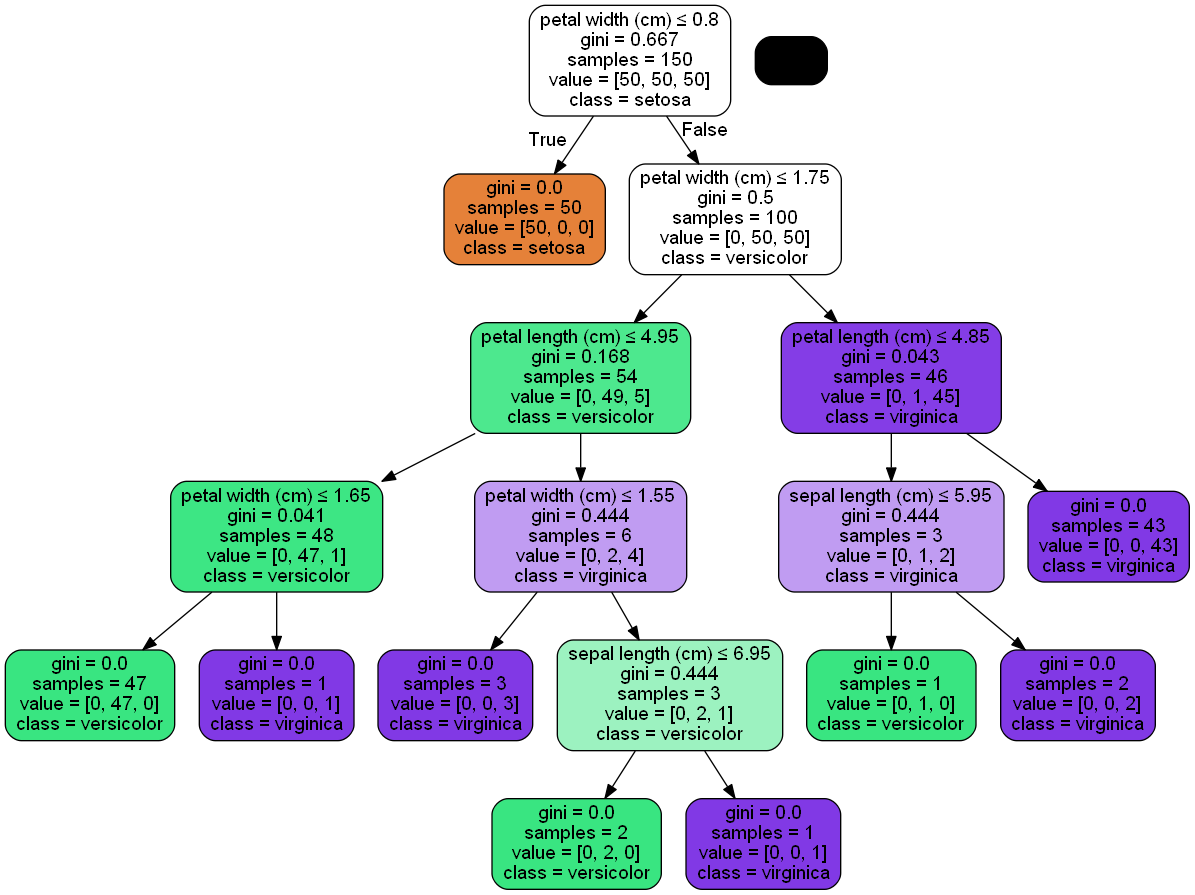

In [5]:
Image(graph.create_png(), width=700) 

The DecisionTrees have 2 ways to count the homogeniously of the data:

- gini
- entropy

In [8]:
# δασικη καλυψη
from sklearn.datasets import fetch_covtype

fcover = fetch_covtype(as_frame=True)

fcover.data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
fcover.target

0         5
1         5
2         2
3         2
4         5
         ..
581007    3
581008    3
581009    3
581010    3
581011    3
Name: Cover_Type, Length: 581012, dtype: int32

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(fcover.data, fcover.target,
                                                   test_size=0.25, random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV

max_depth = list(range(10, 20+1))
max_depth.append(None)

parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': max_depth
}

clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=-1)

clf = clf.fit(X_train, y_train)
print(clf.best_estimator_)
print(clf.best_params_)

In [ ]:
import sklearn.metrics import classification_report

y_predict = clf.predict(X_test)
print(classification_reposrt(y_test,y_pred))